In [12]:
# Installing Libraries
!pip install codecarbon

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


[codecarbon INFO @ 08:22:56] [setup] RAM Tracking...
[codecarbon INFO @ 08:22:56] [setup] GPU Tracking...
[codecarbon INFO @ 08:22:56] No GPU found.
[codecarbon INFO @ 08:22:56] [setup] CPU Tracking...
[codecarbon WARNING @ 08:22:56] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 08:22:57] CPU Model on constant consumption mode: Intel(R) Xeon(R) Platinum 8259CL CPU @ 2.50GHz
[codecarbon INFO @ 08:22:57] >>> Tracker's metadata:
[codecarbon INFO @ 08:22:57]   Platform system: Linux-5.10.102-99.473.amzn2.x86_64-x86_64-with-glibc2.10
[codecarbon INFO @ 08:22:57]   Python version: 3.8.12
[codecarbon INFO @ 08:22:57]   Available RAM : 3.773 GB
[codecarbon INFO @ 08:22:57]   CPU count: 2
[codecarbon INFO @ 08:22:57]   CPU model: Intel(R) Xeon(R) Platinum 8259CL CPU @ 2.50GHz
[codecarbon INFO @ 08:22:57]   GPU count: None
[codecarbon INFO @ 08:22:57]   GPU model: None


Data Loading, EDA, Pre-processing
session created
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4    

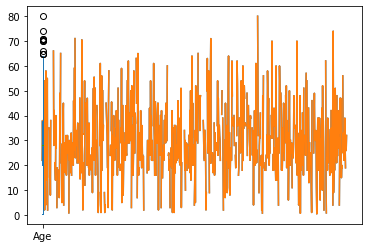

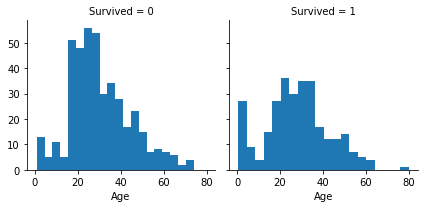

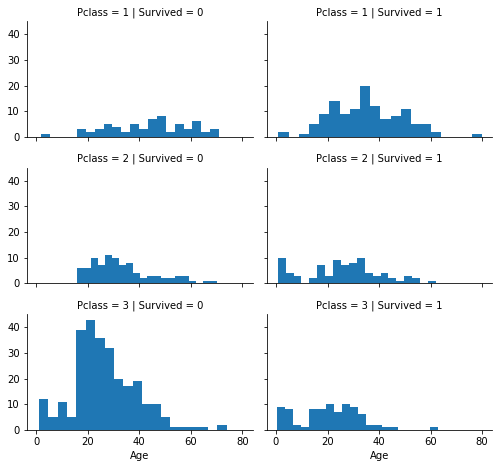

before (891, 12) (418, 11) (891, 12) (418, 11)
after (891, 10) (418, 9) (891, 10) (418, 9)
(891, 11) (418, 10) (891, 11) (418, 10)
before (891, 11) (418, 10) (891, 11) (418, 10)
after (891, 9) (418, 9) (891, 9) (418, 9)


[codecarbon INFO @ 08:23:01] Energy consumed for RAM : 0.000002 kWh. RAM Power : 1.4149346351623535 W
[codecarbon INFO @ 08:23:01] Energy consumed for all CPUs : 0.000131 kWh. All CPUs Power : 105.0 W
[codecarbon INFO @ 08:23:01] 0.000132 kWh of electricity used since the begining.


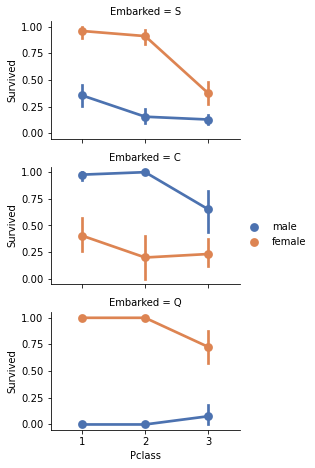

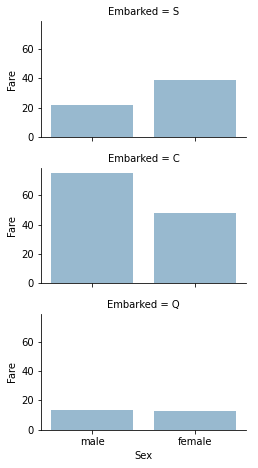

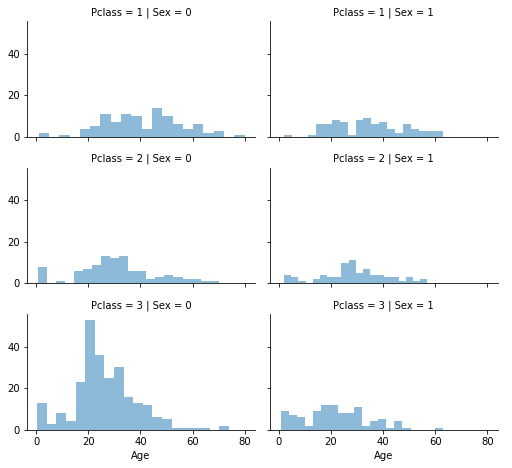

In [15]:
'''preprocessing script'''
# importing libraries
import os
import sys
from io import StringIO 
import boto3
import pandas as pd
import numpy
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import seaborn as sns
from codecarbon import EmissionsTracker
import warnings
warnings.filterwarnings('ignore')

#__location__ = os.path.realpath(os.path.join(os.getcwd(), os.path.dirname(__file__)))

def preprocessing(region, bucket, train_df, test_df):
    aws_session = boto3.Session()
    print('Data Loading, EDA, Pre-processing')
    print('session created')
    #print(region)
    #print(bucket_name)
    #print(input_filekey)
    #print(preprocessed_filekey)
    s3 = aws_session.client('s3', region_name=region)
    s3_resource = boto3.resource('s3')

    obj = s3.get_object(Bucket=bucket, Key=train_df)
    train_df = pd.read_csv(obj['Body']) 
    print(train_df.head())
    train_df = pd.read_csv('train.csv')
    test_df = pd.read_csv('test.csv')
    combine = [train_df,test_df]
    train_df.shape
    test_df.shape
    combine[0].shape
    combine[1].shape

    train_df['Age'].plot()
    train_df['Age'].plot(kind='line')
    #train_df['Age'].plot(kind='scatter')
    train_df['Age'].plot(kind='box')

    train_df.head()
    train_df.tail()
    train_df.describe()
    train_df.describe(include=['O'])

    train_df[['Pclass','Survived']].groupby(['Pclass'],
            as_index=False).mean().sort_values(by='Survived',ascending=True)
    train_df[['Sex','Survived']].groupby(['Sex'],
            as_index=False).mean().sort_values(by='Sex',ascending=False)
    train_df[['SibSp','Survived']].groupby(['SibSp'],
            as_index=False).mean().sort_values(by='SibSp',ascending=False)
    train_df[['Parch','Survived']].groupby(['Parch'],
            as_index=False).mean().sort_values(by='Parch',ascending=False)

    g = sns.FacetGrid(train_df,col='Survived')
    g.map(plt.hist,'Age',bins=20)
    plt.show()
    g = sns.FacetGrid(train_df,col='Survived',row='Pclass',size=2.2,aspect=1.6)
    g.map(plt.hist,'Age',bins=20)
    plt.show()
    g = sns.FacetGrid(train_df,row='Embarked',size=2.2,aspect=1.6)
    g.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
    g.add_legend()
    g = sns.FacetGrid(train_df,row='Embarked',size=2.2,aspect=1.6)
    g.map(sns.barplot,'Sex','Fare',alpha=0.5,ci=None)
    g.add_legend()

    print('before',train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)
    train_df = train_df.drop(['Ticket','Cabin'],axis=1)
    test_df = test_df.drop(['Ticket','Cabin'],axis=1)
    combine = [train_df,test_df]
    print('after',train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)

    for dataset in combine:
        dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
    print(train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)
    pd.crosstab(train_df['Title'],train_df['Sex'])

    for dataset in combine:
        dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
               'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Rare')
        dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
        dataset['Title'] = dataset['Title'].replace('Ms','Miss')
        dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
    train_df[['Title','Survived']].groupby(['Title'],
            as_index=False).mean().sort_values(by='Survived',ascending=False)

    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    for dataset in combine:
        dataset['Title'] = dataset['Title'].map(title_mapping)
        dataset['Title'] = dataset['Title'].fillna(0)
    train_df.head()

    print('before',train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)
    train_df = train_df.drop(['Name','PassengerId'],axis=1)
    test_df = test_df.drop(['Name'],axis=1)
    combine = [train_df,test_df]
    print('after',train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)

    for dataset in combine:
        dataset['Sex'] = dataset['Sex'].map({'female':1,'male':0}).astype(int)
    train_df.head()

    g = sns.FacetGrid(train_df,row='Pclass',col='Sex',size=2.2,aspect=1.6)
    g.map(plt.hist,'Age',alpha=0.5,bins=20)
    g.add_legend()

    guess_ages = np.zeros((2,3))
    guess_ages

    for dataset in combine:
        for i in range(0,2):
            for j in range(0,3):
                guess_df = dataset[(dataset['Sex']==i) & 
                                   (dataset['Pclass']==j+1)]['Age'].dropna()
                age_guess = guess_df.median()
                guess_ages[i,j] = int( age_guess/0.5 + 0.5) * 0.5
    guess_ages           
    for dataset in combine:
       for i in range(0,2):
           for j in range(0,3):
               dataset.loc[(dataset.Age.isnull()) & (dataset.Sex ==i) & (dataset.Pclass ==j+1),\
                           'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)
    train_df.head(10)

    train_df['AgeBand'] = pd.cut(train_df['Age'],5)
    train_df[['AgeBand','Survived']].groupby(['AgeBand'],
            as_index=False).mean().sort_values(by='Survived',ascending=False)

    for dataset in combine:
        dataset.loc[dataset['Age'] <= 16 , 'Age'] = 0
        dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32),'Age'] = 1
        dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48),'Age'] = 2
        dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64),'Age'] = 3
        dataset.loc[dataset['Age'] > 64,'Age'] 
    train_df.head(10)

    train_df = train_df.drop(['AgeBand'],axis=1)
    combine = [train_df,test_df]

    for dataset in combine:
        dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    train_df[['FamilySize','Survived']].groupby(['FamilySize'],
            as_index=False).mean().sort_values(by='Survived',ascending=False) 

    for dataset in combine: 
        dataset['IsAlone'] = 0
        dataset.loc[dataset['FamilySize']==1,'IsAlone'] = 1
    train_df[['IsAlone','Survived']].groupby(['IsAlone'],
            as_index=False).mean().sort_values(by='Survived',ascending=False)    

    train_df = train_df.drop(['Parch','SibSp','FamilySize'],axis=1)
    test_df = test_df.drop(['Parch','SibSp','FamilySize'],axis=1)
    combine = [train_df,test_df]

    for dataset in combine:
        dataset['Age*Class'] = dataset.Age * dataset.Pclass
    train_df.loc[:,['Age*Class','Age','Pclass']].head(10)   

    freq_port = train_df.Embarked.dropna().mode()[0]
    freq_port

    for dataset in combine:
        dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    train_df[['Embarked','Survived']].groupby(['Embarked'],
            as_index=False).mean().sort_values(by='Survived',ascending=False)  

    for dataset in combine:
        dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
    train_df.head()

    test_df['Fare'].fillna(test_df['Fare'].dropna().median(),inplace=True)
    test_df.head()

    train_df['FareBand'] = pd.cut(train_df['Fare'],4)
    train_df[['FareBand','Survived']].groupby(['FareBand'],
            as_index=False).mean().sort_values(by='FareBand',ascending=False)

    for dataset in combine:
        dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
        dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454),'Fare'] = 1
        dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31),'Fare'] = 2
        dataset.loc[(dataset['Fare'] > 31) ,'Fare'] = 3
        dataset['Fare'] = dataset['Fare'].astype(int)
    train_df = train_df.drop(['FareBand'],axis=1)
    combine = [train_df,test_df]
    train_df.shape,test_df.shape


    X_train = train_df.drop('Survived',axis=1)
    Y_train = train_df['Survived']
    X_test = test_df.drop('PassengerId',axis=1).copy()
    X_train.shape,Y_train.shape,X_test.shape    
    
    pd.DataFrame(X_train).to_csv("s3://sagemaker-dataset-storage/titanic-data/dataset/X-train.csv",index=False)
    pd.DataFrame(Y_train).to_csv("s3://sagemaker-dataset-storage/titanic-data/dataset/Y-train.csv",index=False)
    pd.DataFrame(X_test).to_csv("s3://sagemaker-dataset-storage/titanic-data/dataset/X-test.csv",index=False)
    #X_train.to_csv('xtrain.csv')
    #Y_train.to_csv('ytrain.csv')
    #X_test.to_csv('xtest')
    
    #s3_resource.Object(bucket, X_train).put(Body=csv_buffer1.getvalue())

if __name__ == '__main__':
    tracker_pipeline = EmissionsTracker(project_name="Codecarbon_Pipeline-dataloading", save_to_file=True)
    tracker_pipeline.start()
    #region_name = sys.argv[1]
    #bucket_name = sys.argv[2]
    #input_filekey = sys.argv[3]
    #preprocessed_filekey = sys.argv[4]
    region_name = 'us-east-1'
    bucket_name = 'sagemaker-dataset-storage'
    train_df = 'titanic-data/dataset/train.csv'
    test_df = 'titanic-data/dataset/test.csv'
    preprocessing(region_name, bucket_name, train_df, test_df)
    tracker_pipeline.stop()

In [16]:
# importing libraries
import sys
import json
import joblib
import pickle
import boto3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from codecarbon import EmissionsTracker


def model_training(region, bucket, X_train, Y_train):
    """na"""
    aws_session = boto3.Session()
    print('session created - model training')
    s3 = aws_session.client('s3', region_name=region)
    
    obj = s3.get_object(Bucket=bucket, Key=X_train)
    X_train = pd.read_csv(obj['Body']) 
    obj = s3.get_object(Bucket=bucket, Key=Y_train)
    Y_train = pd.read_csv(obj['Body']) 
    #print(X_train.head())
        
    random_forest = RandomForestClassifier(n_estimators=100)
    random_forest.fit(X_train,Y_train)

    
    
     
    s3_resource = boto3.resource('s3')
    pickle_byte_obj = pickle.dumps(random_forest)
    model_filekey = 'titanic-data/model/model.pkl'
    s3_resource.Object(bucket_name, model_filekey).put(Body=pickle_byte_obj)

    

    


if __name__ == '__main__':
    tracker_pipeline = EmissionsTracker(project_name="Codecarbon_Pipelin-training", save_to_file=True)
    tracker_pipeline.start()
    #region_name = sys.argv[1]
    #bucket_name = sys.argv[2]
    #preprocessed_filekey = sys.argv[3]
    #model_filekey = sys.argv[4]
    region_name = 'us-east-1'
    bucket_name = 'sagemaker-dataset-storage'
    X_train = 'titanic-data/dataset/X-train.csv'
    Y_train = 'titanic-data/dataset/Y-train.csv'    
    model_training(region_name, bucket_name, X_train, Y_train)
    tracker_pipeline.stop()
    #py training.py us-east-1 aabg-artifact-us-east-1-byom-v1 preprocessed/preprocessed_data.csv model/model.pkl

[codecarbon INFO @ 08:23:55] [setup] RAM Tracking...
[codecarbon INFO @ 08:23:55] [setup] GPU Tracking...
[codecarbon INFO @ 08:23:55] No GPU found.
[codecarbon INFO @ 08:23:55] [setup] CPU Tracking...
[codecarbon WARNING @ 08:23:55] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 08:23:56] CPU Model on constant consumption mode: Intel(R) Xeon(R) Platinum 8259CL CPU @ 2.50GHz
[codecarbon INFO @ 08:23:56] >>> Tracker's metadata:
[codecarbon INFO @ 08:23:56]   Platform system: Linux-5.10.102-99.473.amzn2.x86_64-x86_64-with-glibc2.10
[codecarbon INFO @ 08:23:56]   Python version: 3.8.12
[codecarbon INFO @ 08:23:56]   Available RAM : 3.773 GB
[codecarbon INFO @ 08:23:56]   CPU count: 2
[codecarbon INFO @ 08:23:56]   CPU model: Intel(R) Xeon(R) Platinum 8259CL CPU @ 2.50GHz
[codecarbon INFO @ 08:23:56]   GPU count: None
[codecarbon INFO @ 08:23:56]   GPU model: None


session created - model training


[codecarbon INFO @ 08:23:56] Energy consumed for RAM : 0.000000 kWh. RAM Power : 1.4149346351623535 W
[codecarbon INFO @ 08:23:56] Energy consumed for all CPUs : 0.000016 kWh. All CPUs Power : 105.0 W
[codecarbon INFO @ 08:23:56] 0.000017 kWh of electricity used since the begining.


In [17]:
import pandas as pd
import pickle
import boto3
import configparser
from sklearn.metrics import f1_score, make_scorer
from codecarbon import EmissionsTracker

#print('After updating config.conf')
#print('Updated at 20:47')
#config = configparser.ConfigParser()
#config.read('config.conf')
tracker_pipeline_prediction = EmissionsTracker(project_name="Codecarbon_Pipelin-prediction", save_to_file=True)
tracker_pipeline_prediction.start()
bucket = 'sagemaker-dataset-storage'
region = 'us-east-1'
X_test = 'titanic-data/dataset/X-test.csv'
X_train = 'titanic-data/dataset/X-train.csv'
Y_train = 'titanic-data/dataset/Y-train.csv'


#bucket_name = config['DEFAULT']['BucketName']
model_name = 'titanic-data/model/model.pkl'

s3 = boto3.resource('s3')
model = pickle.loads(s3.Bucket(bucket_name).Object(model_name).get()['Body'].read())

aws_session = boto3.Session()
print('session created - model prediction')
s3 = aws_session.client('s3', region_name=region)

obj = s3.get_object(Bucket=bucket, Key=X_test)
X_test = pd.read_csv(obj['Body']) 

obj = s3.get_object(Bucket=bucket, Key=X_train)
X_train = pd.read_csv(obj['Body']) 
obj = s3.get_object(Bucket=bucket, Key=Y_train)
Y_train = pd.read_csv(obj['Body'])


# obj = s3.get_object(Bucket=bucket_name, Key=X_test)
# X_test = pd.read_csv(obj['Body']) 
print(X_test.head())
print(X_train.head())

test_predictions = model.predict(X_test)
print(test_predictions)
train_predictions = model.predict(X_train)
print(train_predictions)

from sklearn.metrics import confusion_matrix
best_cn_train = confusion_matrix(Y_train,train_predictions)

best_f1score_train = f1_score(Y_train,train_predictions)
print(best_f1score_train)
tracker_pipeline_prediction.stop()

#plot_model(X, y, best_clf)

# from flask import Flask, request, jsonify
# app = Flask(__name__)
# @app.route('/api',methods=['POST'])
# def predict():
#     data = request.get_json(force=True)
#     print('++++++++')
#     print(data)
#     print('++++++++')
#     prediction = model.predict(pd.DataFrame(data, index=[0]))
#     print(prediction)
#     return jsonify({"prediction": int(prediction[0])})
#     # data = request.get_json(force=True)
#     # prediction = model.predict([[np.array(data['exp'])]])
#     # output = prediction[0]
#     # return jsonify(output)

# if __name__ == '__main__':
#     app.run(host='0.0.0.0', port=8080, debug=True)

[codecarbon INFO @ 08:24:39] [setup] RAM Tracking...
[codecarbon INFO @ 08:24:39] [setup] GPU Tracking...
[codecarbon INFO @ 08:24:39] No GPU found.
[codecarbon INFO @ 08:24:39] [setup] CPU Tracking...
[codecarbon WARNING @ 08:24:39] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 08:24:39] CPU Model on constant consumption mode: Intel(R) Xeon(R) Platinum 8259CL CPU @ 2.50GHz
[codecarbon INFO @ 08:24:39] >>> Tracker's metadata:
[codecarbon INFO @ 08:24:39]   Platform system: Linux-5.10.102-99.473.amzn2.x86_64-x86_64-with-glibc2.10
[codecarbon INFO @ 08:24:39]   Python version: 3.8.12
[codecarbon INFO @ 08:24:39]   Available RAM : 3.773 GB
[codecarbon INFO @ 08:24:39]   CPU count: 2
[codecarbon INFO @ 08:24:39]   CPU model: Intel(R) Xeon(R) Platinum 8259CL CPU @ 2.50GHz
[codecarbon INFO @ 08:24:39]   GPU count: None
[codecarbon INFO @ 08:24:39]   GPU model: None


session created - model prediction
   Pclass  Sex  Age  Fare  Embarked  Title  IsAlone  Age*Class
0       3    0    2     0         2      1        1          6
1       3    1    2     0         0      3        0          6
2       2    0    3     1         2      1        1          6
3       3    0    1     1         0      1        1          3
4       3    1    1     1         0      3        0          3
   Pclass  Sex  Age  Fare  Embarked  Title  IsAlone  Age*Class
0       3    0  1.0     0         0      1        0        3.0
1       1    1  2.0     3         1      3        0        2.0
2       3    1  1.0     1         0      2        1        3.0
3       1    1  2.0     3         0      3        0        2.0
4       3    0  2.0     1         0      1        1        6.0
[0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 

[codecarbon INFO @ 08:24:40] Energy consumed for RAM : 0.000000 kWh. RAM Power : 1.4149346351623535 W
[codecarbon INFO @ 08:24:40] Energy consumed for all CPUs : 0.000012 kWh. All CPUs Power : 105.0 W
[codecarbon INFO @ 08:24:40] 0.000012 kWh of electricity used since the begining.


[0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0
 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 0 0 

4.39601803026757e-06

In [19]:
emission_csv = pd.read_csv('emissions.csv')
pd.DataFrame(emission_csv).to_csv("s3://sagemaker-dataset-storage/titanic-data/Emission/emission_csv.csv",index=False)